In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
from filter_tc.particle_filter import ParticleFilter
import numpy as np
import matplotlib.pyplot as plt

In [58]:
num_particles = 100
pf_alpha = 0.1

pf = ParticleFilter(
    num_particles=num_particles,
    r_measurement_noise=1e2,
    q_process_noise=np.array([100, 1]),
    scale=1e-3,
    loc=-50,
    alpha = pf_alpha)

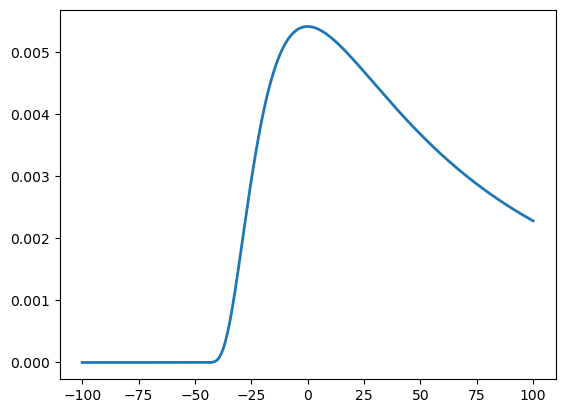

In [59]:
x = np.linspace(-100, 100, 1000)
plt.plot(x, pf.event_distribution.pdf(x), lw=2, c='tab:blue', label='invWeibull')


(array([ 3., 11., 10., 11., 14., 18., 17.,  8.,  7.,  1.]),
 array([-207.43250095, -163.3248944 , -119.21728784,  -75.10968128,
         -31.00207473,   13.10553183,   57.21313838,  101.32074494,
         145.4283515 ,  189.53595805,  233.64356461]),
 <BarContainer object of 10 artists>)

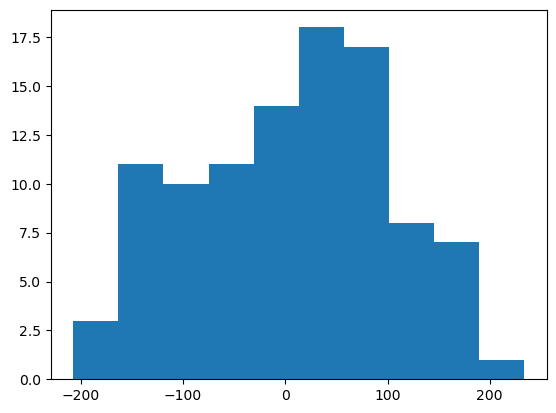

In [60]:
pf.predict(np.array([10, 1]))
old_particles = pf.particles.copy()
plt.hist(pf.particles[:,0])

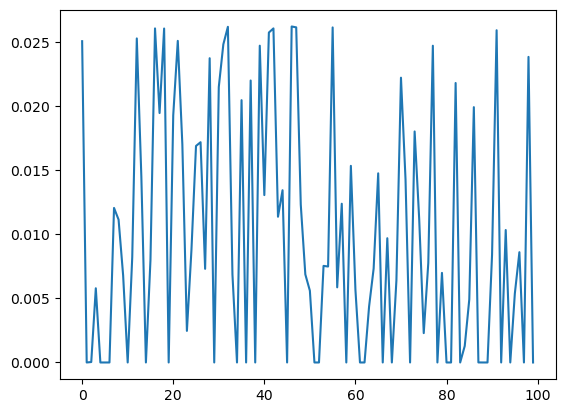

In [61]:
pf.update(np.array([21]))
#plt.hist(pf.particles[:,0])
plt.plot(pf.weights)
old_weights = pf.weights.copy()

In [62]:
np.argmax(pf.weights)


46

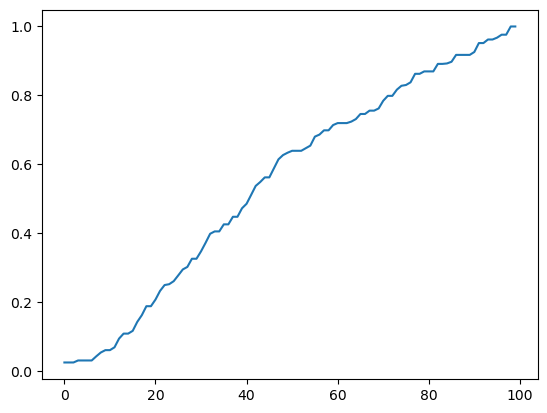

In [63]:
cumulative_sum = np.cumsum(pf.weights)
plt.plot(cumulative_sum)

In [64]:
cumulative_sum /= cumulative_sum[pf.num_particles-1]
randoms = np.random.rand(pf.num_particles)
indexes = np.searchsorted(cumulative_sum, randoms)
indexes

array([47, 47, 37, 86,  9, 47,  9, 32, 86, 85, 18, 30, 77, 17, 41, 73, 43,
       41, 35, 41, 76,  0, 79, 39, 39, 77, 47, 13, 28, 12, 21, 16,  3, 42,
       13, 13, 39, 46, 93, 86,  0, 91, 82, 57, 46, 64, 82, 82, 91, 47, 54,
       27, 35, 33, 32, 44, 31, 20, 54, 71, 57, 25,  7, 16, 50, 79, 85, 39,
       33, 20, 90, 16, 11, 30, 98, 39, 13, 13,  8, 32, 75, 49, 50, 73, 67,
       12, 59, 11, 86, 76, 63, 35, 86, 25, 71, 76, 93, 43, 54, 26],
      dtype=int64)

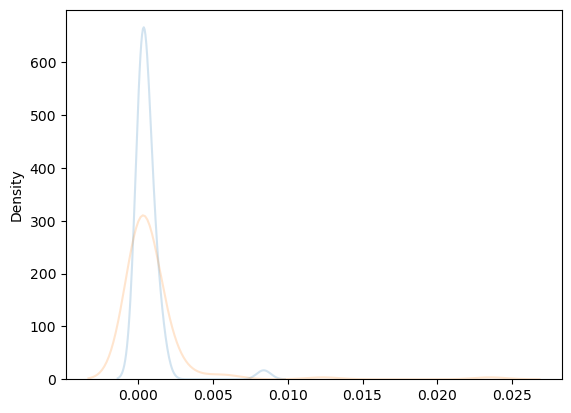

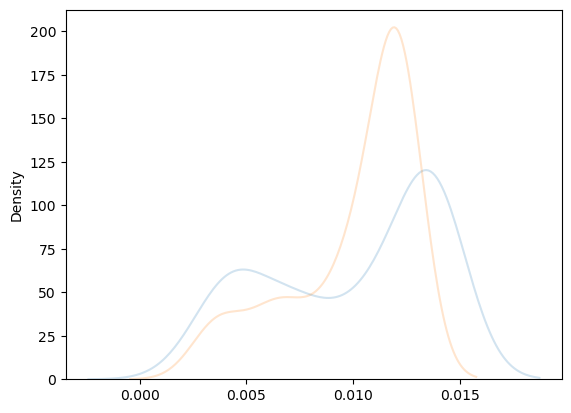

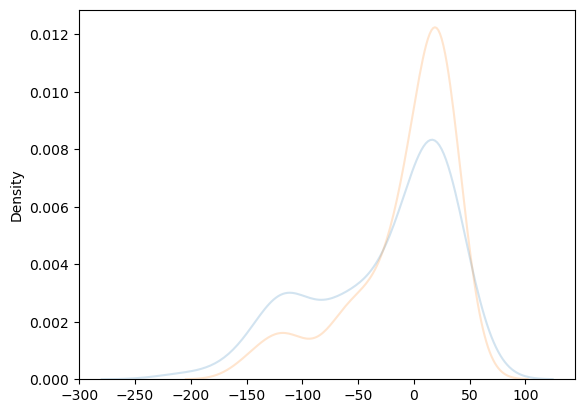

In [73]:
import seaborn as sns
scale = 1e-2
cumulative_sum = np.cumsum(pf.weights)
# normalize the cumulative sum to be in [0, 1]
cumulative_sum /= cumulative_sum[pf.num_particles-1]
randoms = np.random.rand(pf.num_particles)

# Choose the particle indices based on the cumulative sum
indexes = np.searchsorted(cumulative_sum, randoms)
noise_scale = scale / np.abs(pf.particles[indexes])
noise = np.random.exponential(
    scale=noise_scale,
    size=(pf.num_particles, 2))
sns.kdeplot(noise_scale[:,0], alpha=0.2)
sns.kdeplot(noise[:,0], alpha=0.2)
plt.show()

# keep the weights of the resampled particles
new_weights = pf.weights[indexes]
# normalize the weights
new_weights /= np.sum(new_weights)
sns.kdeplot(pf.weights, alpha=0.2)
sns.kdeplot(new_weights, alpha=0.2)
plt.show()

new_particles = pf.particles[indexes]# - noise
sns.kdeplot(pf.particles[:,0], alpha=0.2)
sns.kdeplot(new_particles[:,0], alpha=0.2)
plt.show()

[[2.05679242e-06 7.98258583e-05]
 [4.22707921e-05 8.62377702e-04]
 [5.68393438e-05 1.18716007e-03]
 [1.70128964e-04 1.31498887e-03]
 [7.15181145e-05 5.53537304e-04]
 [3.45790867e-05 7.27653434e-02]
 [1.35449273e-04 1.54862930e-03]
 [4.63156501e-05 3.96977959e-04]
 [2.43004374e-05 4.81564337e-04]
 [3.56988714e-04 6.42489865e-03]
 [5.34201167e-06 4.01774017e-03]
 [1.50062137e-05 1.59931666e-01]
 [1.01687703e-04 3.93067424e-03]
 [4.59476736e-04 2.02524455e-04]
 [1.87221138e-05 5.44913509e-04]
 [6.10142096e-04 1.46235958e-03]
 [2.79815501e-06 3.40416299e-03]
 [3.21095759e-04 4.94379964e-06]
 [1.99005856e-05 9.82923895e-04]
 [2.12329791e-05 1.71906648e-04]
 [1.54646183e-05 1.70481815e-03]
 [7.95489677e-06 4.56453391e-04]
 [3.32330429e-05 4.65659644e-03]
 [5.24842024e-06 3.07642041e-04]
 [2.76456439e-05 7.36984691e-04]
 [9.72904625e-06 1.35528403e-03]
 [3.35076240e-05 1.22236486e-03]
 [2.74125706e-05 9.72237944e-05]
 [1.84664559e-05 6.08802098e-02]
 [4.48138899e-05 7.26819940e-04]
 [7.440020

(array([ 1.,  2.,  1., 16.,  1.,  9.,  8., 13., 40.,  9.]),
 array([-2.07432520e+02, -1.81482145e+02, -1.55531771e+02, -1.29581397e+02,
        -1.03631023e+02, -7.76806491e+01, -5.17302750e+01, -2.57799009e+01,
         1.70473223e-01,  2.61208473e+01,  5.20712214e+01]),
 <BarContainer object of 10 artists>)

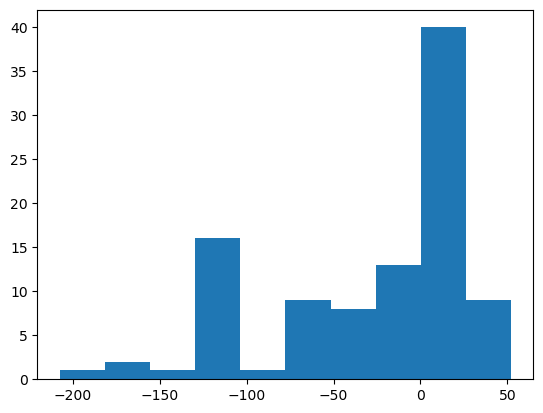

In [66]:
pf.simple_resample()
plt.hist(pf.particles[:,0])

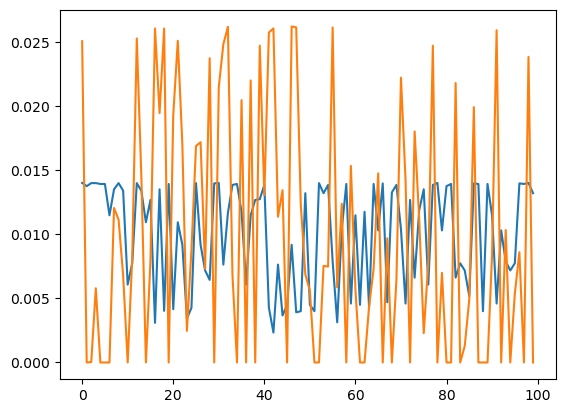

In [67]:
plt.plot(pf.weights)
plt.plot(old_weights)

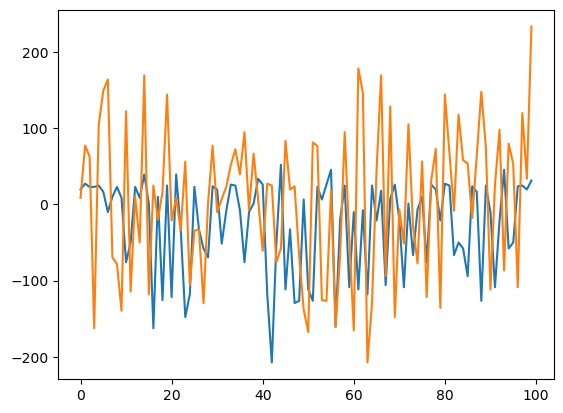

In [68]:
plt.plot(pf.particles[:,0])
plt.plot(old_particles[:,0])

<Axes: ylabel='Density'>

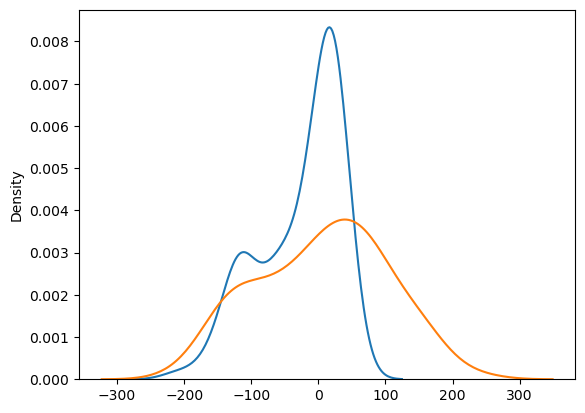

In [69]:
import seaborn as sns
sns.kdeplot(pf.particles[:,0])
sns.kdeplot(old_particles[:,0])